# Now load the saved model and re-run the same frog-or-not tests

### Please make sure you have run the previous notebood and saved the model otherwise this notebook won't work.

In [32]:
from tensorflow import keras

model = keras.models.load_model('saved_models/frogdog_model_good')


## Done!

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

## Test with outside images

### Load the images and display them

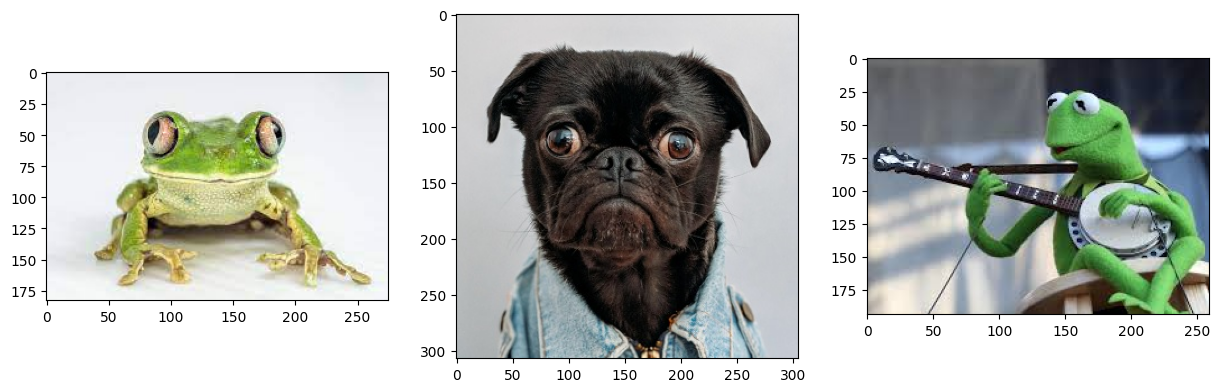

In [34]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path

img_dir = Path('internet_images')

internet_frog = Image.open(img_dir / Path('frog.jpg'))
internet_merlion = Image.open(img_dir / Path('dog.jpg'))
internet_kermit = Image.open(img_dir / Path('kermit.jpg'))

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(internet_frog)
plt.subplot(1,3,2)
plt.imshow(internet_merlion)
plt.subplot(1,3,3)
plt.imshow(internet_kermit)
plt.show()

## Convert images to fit the input requirements of the AI and create shortcut functions

We re-use the previous code here 

In [35]:
import numpy as np

internet_frog_small = internet_frog.resize((32,32))
internet_merlion_small = internet_merlion.resize((32,32))
internet_kermit_small = internet_kermit.resize((32,32))


new_imgs = np.stack([np.asarray(internet_frog_small),
                     np.asarray(internet_merlion_small),
                     np.asarray(internet_kermit_small)],
                    axis=0)

def normalise(in_img):
    # Assume 0 to max.
    out_img = in_img / in_img.max()
    return out_img


def infer_img(img):

    for i, im in enumerate(img):
        plt.figure(figsize=(4, 2))

        plt.xticks([])
        plt.yticks([])
        plt.imshow(im, cmap=plt.cm.binary)
        plt.show()

        output = model.predict(img[i:i+1])
        if output[0,1] > output[0,0]:
            ai_output = 'DOG'
        else:
            ai_output = 'FROG'

        print(f'Inference: {output}, AI says: {ai_output}')


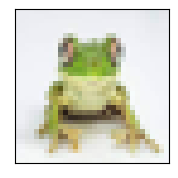

Inference: [[ 9.827914  -7.7513204]], AI says: FROG


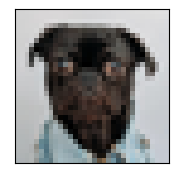

Inference: [[-0.9112055  1.1696702]], AI says: DOG


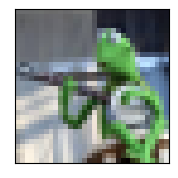

Inference: [[0.01981017 0.29319516]], AI says: DOG


In [36]:

out = infer_img(normalise(new_imgs))

## That's great, but I want to test it against a different image from google...

### OK- can.  We need to make the pipeline clear.

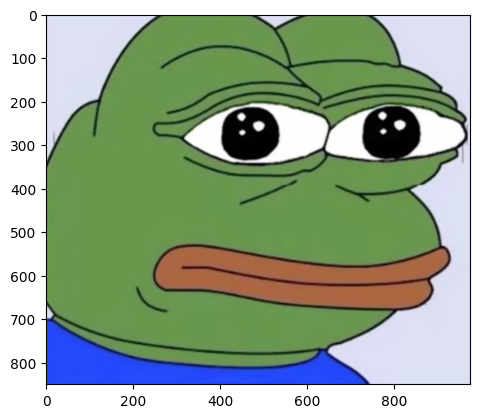

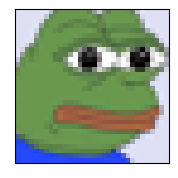

Inference: [[ 1.976725  -1.7547733]], AI says: FROG


In [39]:
# Replace this with whatever image link you like
# img_address = 'https://media.nature.com/w700/magazine-assets/d41586-017-03864-w/d41586-017-03864-w_15072998.jpg'
img_address = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/17638/production/_124800859_gettyimages-817514614.jpg'
img_address = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/16620/production/_91408619_55df76d5-2245-41c1-8031-07a4da3f313f.jpg.webp'
import requests
test_imgfile = Path('frog_downloads') / Path('test_image.jpg')

# -------- DOWNLOAD IMAGE
response = requests.get(img_address)

# -------- SAVE IMAGE
with open(test_imgfile, "wb") as localfile:
    localfile.write(response.content)

# ----------  LOAD & DISPLAY IMAGE
test_img = Image.open(test_imgfile)
plt.imshow(test_img)
plt.show()

# ----------  RESIZE IMAGE
new_size = (32, 32)
test_img = test_img.resize(new_size)

# ----------  FORMAT DATA
new_imgs = np.stack([np.asarray(test_img),], axis=0)

# -----------  INFER WITH AI
out = infer_img(normalise(new_imgs))

## Woohoo!